<a href="https://colab.research.google.com/github/saivaruntejamudumba/Austin-AirBnB-Price-Prediction/blob/master/AirBnB_Austin_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv('listings.csv')
data.head()

C:\Users\varun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,2.019090e+13,9/19/2019,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19
1,5245,https://www.airbnb.com/rooms/5245,2.019090e+13,9/19/2019,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07
2,5456,https://www.airbnb.com/rooms/5456,2.019090e+13,9/19/2019,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89
3,5769,https://www.airbnb.com/rooms/5769,2.019090e+13,9/19/2019,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,f,moderate,t,t,1,0,1,0,2.20
4,6413,https://www.airbnb.com/rooms/6413,2.019090e+13,9/19/2019,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.84


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 9.2+ MB


In [0]:
data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.133900e+04,1.133900e+04,0.0,0.0,0.0,1.133900e+04,0.0,11334.000000,11334.000000,11339.000000,...,8756.000000,8754.000000,8755.000000,8749.000000,8750.000000,11339.000000,11339.000000,11339.000000,11339.000000,8879.000000
mean,2.057926e+07,2.019090e+13,NaN,NaN,NaN,6.613995e+07,NaN,46.008029,46.008029,78722.287591,...,9.628026,9.858807,9.867619,9.779289,9.606514,9.022577,7.710556,0.695211,0.357263,1.696899
std,1.154606e+07,0.000000e+00,NaN,NaN,NaN,7.416009e+07,NaN,229.714369,229.714369,20.595349,...,0.807269,0.570364,0.537339,0.579406,0.766798,23.897120,23.255865,2.633131,3.889977,2.149944
min,2.265000e+03,2.019090e+13,NaN,NaN,NaN,2.300000e+01,NaN,0.000000,0.000000,78701.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.114600e+07,2.019090e+13,NaN,NaN,NaN,8.052684e+06,NaN,1.000000,1.000000,78704.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.260000
50%,2.135336e+07,2.019090e+13,NaN,NaN,NaN,3.328677e+07,NaN,1.000000,1.000000,78721.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.980000
75%,3.091535e+07,2.019090e+13,NaN,NaN,NaN,1.096383e+08,NaN,4.000000,4.000000,78744.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000,1.000000,0.000000,2.480000
max,3.873232e+07,2.019090e+13,NaN,NaN,NaN,2.958308e+08,NaN,1799.000000,1799.000000,78759.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,144.000000,144.000000,26.000000,48.000000,62.500000


In [0]:
col_list=list(data.columns)

In [0]:
col_list

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [0]:
data['price'].head()

0    $225.00 
1    $100.00 
2     $95.00 
3     $40.00 
4     $99.00 
Name: price, dtype: object

In [0]:
data.price.tail()

11334    $400.00 
11335     $55.00 
11336     $50.00 
11337    $455.00 
11338     $43.00 
Name: price, dtype: object

In [0]:
data.price

0        $225.00 
1        $100.00 
2         $95.00 
3         $40.00 
4         $99.00 
5        $129.00 
6         $40.00 
7        $260.00 
8        $300.00 
9        $550.00 
10       $220.00 
11       $155.00 
12        $54.00 
13        $95.00 
14       $100.00 
15        $55.00 
16        $35.00 
17       $289.00 
18        $59.00 
19       $350.00 
20       $105.00 
21        $35.00 
22        $40.00 
23       $130.00 
24       $500.00 
25        $90.00 
26       $165.00 
27        $99.00 
28        $89.00 
29       $145.00 
           ...   
11309    $225.00 
11310    $120.00 
11311    $225.00 
11312    $137.00 
11313    $137.00 
11314    $142.00 
11315     $95.00 
11316     $95.00 
11317    $375.00 
11318    $300.00 
11319    $200.00 
11320     $38.00 
11321    $249.00 
11322     $99.00 
11323    $261.00 
11324    $150.00 
11325    $795.00 
11326    $499.00 
11327    $250.00 
11328    $165.00 
11329    $699.00 
11330     $91.00 
11331     $75.00 
11332     $30.00 
11333    $

In [0]:
data['price'] = data['price'].replace('[\$,)]','', regex=True).astype('float')

In [0]:
data['price']

0        225.0
1        100.0
2         95.0
3         40.0
4         99.0
5        129.0
6         40.0
7        260.0
8        300.0
9        550.0
10       220.0
11       155.0
12        54.0
13        95.0
14       100.0
15        55.0
16        35.0
17       289.0
18        59.0
19       350.0
20       105.0
21        35.0
22        40.0
23       130.0
24       500.0
25        90.0
26       165.0
27        99.0
28        89.0
29       145.0
         ...  
11309    225.0
11310    120.0
11311    225.0
11312    137.0
11313    137.0
11314    142.0
11315     95.0
11316     95.0
11317    375.0
11318    300.0
11319    200.0
11320     38.0
11321    249.0
11322     99.0
11323    261.0
11324    150.0
11325    795.0
11326    499.0
11327    250.0
11328    165.0
11329    699.0
11330     91.0
11331     75.0
11332     30.0
11333    250.0
11334    400.0
11335     55.0
11336     50.0
11337    455.0
11338     43.0
Name: price, Length: 11339, dtype: float64

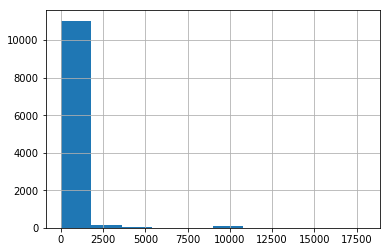

In [0]:
data.price.hist()


In [0]:
import numpy as np
data['log_price'] = np.log(data['price'].values)


C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [0]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2265,https://www.airbnb.com/rooms/2265,2.019090e+13,9/19/2019,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19,5.416100
1,5245,https://www.airbnb.com/rooms/5245,2.019090e+13,9/19/2019,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,4.605170
2,5456,https://www.airbnb.com/rooms/5456,2.019090e+13,9/19/2019,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89,4.553877
3,5769,https://www.airbnb.com/rooms/5769,2.019090e+13,9/19/2019,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,moderate,t,t,1,0,1,0,2.20,3.688879
4,6413,https://www.airbnb.com/rooms/6413,2.019090e+13,9/19/2019,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.84,4.595120


In [0]:
pricelist=list(data.log_price.unique())

In [0]:
pricelist

[5.41610040220442,
 4.605170185988092,
 4.553876891600541,
 3.6888794541139363,
 4.59511985013459,
 4.859812404361672,
 5.560681631015528,
 5.703782474656201,
 6.309918278226516,
 5.393627546352362,
 5.043425116919247,
 3.9889840465642745,
 4.007333185232471,
 3.5553480614894135,
 5.666426688112432,
 4.07753744390572,
 5.857933154483459,
 4.653960350157523,
 4.867534450455582,
 6.214608098422191,
 4.499809670330265,
 5.10594547390058,
 4.48863636973214,
 4.976733742420574,
 5.0689042022202315,
 5.0106352940962555,
 4.700480365792417,
 4.8283137373023015,
 6.152732694704104,
 4.442651256490317,
 4.23410650459726,
 5.438079308923196,
 4.204692619390966,
 4.74493212836325,
 5.214935757608986,
 6.710523109452428,
 4.219507705176107,
 5.272999558563747,
 5.501258210544727,
 6.620073206530356,
 6.0014148779611505,
 3.912023005428146,
 5.170483995038151,
 4.852030263919617,
 4.3694478524670215,
 4.6913478822291435,
 4.77912349311153,
 5.293304824724492,
 6.396929655216146,
 6.230481447578482,

In [0]:
for i in range(len(pricelist)):
    print(i, pricelist[i])

0 5.41610040220442
1 4.605170185988092
2 4.553876891600541
3 3.6888794541139363
4 4.59511985013459
5 4.859812404361672
6 5.560681631015528
7 5.703782474656201
8 6.309918278226516
9 5.393627546352362
10 5.043425116919247
11 3.9889840465642745
12 4.007333185232471
13 3.5553480614894135
14 5.666426688112432
15 4.07753744390572
16 5.857933154483459
17 4.653960350157523
18 4.867534450455582
19 6.214608098422191
20 4.499809670330265
21 5.10594547390058
22 4.48863636973214
23 4.976733742420574
24 5.0689042022202315
25 5.0106352940962555
26 4.700480365792417
27 4.8283137373023015
28 6.152732694704104
29 4.442651256490317
30 4.23410650459726
31 5.438079308923196
32 4.204692619390966
33 4.74493212836325
34 5.214935757608986
35 6.710523109452428
36 4.219507705176107
37 5.272999558563747
38 5.501258210544727
39 6.620073206530356
40 6.0014148779611505
41 3.912023005428146
42 5.170483995038151
43 4.852030263919617
44 4.3694478524670215
45 4.6913478822291435
46 4.77912349311153
47 5.293304824724492
4

In [0]:
print('x=',pricelist[114])
x=pricelist[114]

x= -inf


In [0]:
data[data['log_price']==x][['price','log_price']]

,price,log_price
233,0.0,-inf
5075,0.0,-inf
5094,0.0,-inf
5182,0.0,-inf
5679,0.0,-inf
5808,0.0,-inf


In [0]:
data=data[data['price']!=0]
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2265,https://www.airbnb.com/rooms/2265,2.019090e+13,9/19/2019,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19,5.416100
1,5245,https://www.airbnb.com/rooms/5245,2.019090e+13,9/19/2019,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,4.605170
2,5456,https://www.airbnb.com/rooms/5456,2.019090e+13,9/19/2019,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89,4.553877
3,5769,https://www.airbnb.com/rooms/5769,2.019090e+13,9/19/2019,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,moderate,t,t,1,0,1,0,2.20,3.688879
4,6413,https://www.airbnb.com/rooms/6413,2.019090e+13,9/19/2019,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.84,4.595120


In [0]:
data[data['price']==0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price


In [0]:
data['extra_people'] = data['extra_people'].replace('[\$,)]','', regex=True).astype('float')

In [0]:
data['zipcode'].unique()

array(['78702', '78729', '78704', '78741', '78748', '78705', '78759',
       '78703', '78757', '78749', '78727', '78731', '78758', '78744',
       '78751', '78722', '78733', '78725', '78701', '78721', '78723',
       '78752', nan, '78732', '78746', '78754', '78728', '78737', '78753',
       '78745', '78730', '78724', '78747', '78735', '78756', '78734',
       '78739', '78738', '78726', '78736', '78717', 'TX 78702', '78750',
       '78652', '78620', '78712', '78742', '78669', '78681', '78719',
       '78660', '78767', '78619', 78704.0, 78723.0, 78745.0, 78705.0,
       78758.0, 78747.0, 78702.0, 78701.0, 78744.0, 78721.0, 78752.0,
       78748.0, 78749.0, 78757.0, 78732.0, 78703.0, 78741.0, 78731.0,
       78734.0, 78746.0, 78726.0, 78753.0, 78754.0, 78751.0, 78738.0,
       78728.0, 78722.0, 78756.0, 78735.0, 78620.0, 78717.0, 78729.0,
       78737.0, 78730.0, 78759.0, 78733.0, 78727.0, 78724.0, 78736.0,
       78725.0, 78750.0, 78739.0, 78660.0, 78742.0, 78652.0, 78653.0],
      dtype

In [0]:
data['zipcode']= data['zipcode'].replace('[\^TX,)]','', regex=True).astype('str')
data['zipcode'].unique()

array(['78702', '78729', '78704', '78741', '78748', '78705', '78759',
       '78703', '78757', '78749', '78727', '78731', '78758', '78744',
       '78751', '78722', '78733', '78725', '78701', '78721', '78723',
       '78752', 'nan', '78732', '78746', '78754', '78728', '78737',
       '78753', '78745', '78730', '78724', '78747', '78735', '78756',
       '78734', '78739', '78738', '78726', '78736', '78717', ' 78702',
       '78750', '78652', '78620', '78712', '78742', '78669', '78681',
       '78719', '78660', '78767', '78619', '78704.0', '78723.0',
       '78745.0', '78705.0', '78758.0', '78747.0', '78702.0', '78701.0',
       '78744.0', '78721.0', '78752.0', '78748.0', '78749.0', '78757.0',
       '78732.0', '78703.0', '78741.0', '78731.0', '78734.0', '78746.0',
       '78726.0', '78753.0', '78754.0', '78751.0', '78738.0', '78728.0',
       '78722.0', '78756.0', '78735.0', '78620.0', '78717.0', '78729.0',
       '78737.0', '78730.0', '78759.0', '78733.0', '78727.0', '78724.0',
       '

In [0]:
data.reset_index(inplace=True)

In [0]:
data.head()

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,0,2265,https://www.airbnb.com/rooms/2265,2.019090e+13,9/19/2019,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19,5.416100
1,1,5245,https://www.airbnb.com/rooms/5245,2.019090e+13,9/19/2019,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,4.605170
2,2,5456,https://www.airbnb.com/rooms/5456,2.019090e+13,9/19/2019,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,...,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89,4.553877
3,3,5769,https://www.airbnb.com/rooms/5769,2.019090e+13,9/19/2019,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,...,f,moderate,t,t,1,0,1,0,2.20,3.688879
4,4,6413,https://www.airbnb.com/rooms/6413,2.019090e+13,9/19/2019,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.84,4.595120


In [0]:
data=data.drop('index',axis=1)

In [0]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2265,https://www.airbnb.com/rooms/2265,2.019090e+13,9/19/2019,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19,5.416100
1,5245,https://www.airbnb.com/rooms/5245,2.019090e+13,9/19/2019,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,4.605170
2,5456,https://www.airbnb.com/rooms/5456,2.019090e+13,9/19/2019,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,strict_14_with_grace_period,f,t,1,1,0,0,3.89,4.553877
3,5769,https://www.airbnb.com/rooms/5769,2.019090e+13,9/19/2019,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,moderate,t,t,1,0,1,0,2.20,3.688879
4,6413,https://www.airbnb.com/rooms/6413,2.019090e+13,9/19/2019,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.84,4.595120


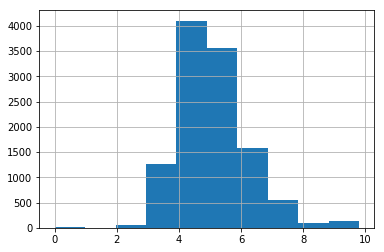

In [0]:
data['log_price'].hist()

In [0]:
data.loc[1]

id                                                                                           5245
listing_url                                                     https://www.airbnb.com/rooms/5245
scrape_id                                                                             2.01909e+13
last_scraped                                                                            9/19/2019
name                                            Eco friendly, Colorful, Clean, Cozy monthly share
summary                                         Situated in a vibrant & diverse multicultural ...
space                                           This green, colorful, clean and cozy house was...
description                                     Situated in a vibrant & diverse multicultural ...
experiences_offered                                                                          none
neighborhood_overview                                                                         NaN
notes               

In [0]:
wanted_cols=['neighbourhood_cleansed','city','zipcode', 'market','latitude', 'longitude','is_location_exact',
 'property_type','room_type', 'accommodates', 'bathrooms','bedrooms', 'beds', 'bed_type',
 'square_feet', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',
 'host_listings_count', 'log_price']

df = data[wanted_cols]
df.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,78702,Austin,78702,Austin,30.27750,-97.71398,f,House,Entire home/apt,4,...,24,93.0,9.0,10.0,10.0,10.0,8.0,9.0,3.0,5.416100
1,78702,Austin,78702,Austin,30.27577,-97.71379,t,House,Private room,2,...,9,91.0,10.0,8.0,10.0,9.0,10.0,9.0,3.0,4.605170
2,78702,Austin,78702,Austin,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,...,499,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.553877
3,78729,Austin,78729,Austin,30.45596,-97.78370,t,House,Private room,2,...,253,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.688879
4,78704,Austin,78704,Austin,30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,...,100,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.595120


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 29 columns):
neighbourhood_cleansed         11333 non-null int64
city                           11331 non-null object
zipcode                        11333 non-null object
market                         11318 non-null object
latitude                       11333 non-null float64
longitude                      11333 non-null float64
is_location_exact              11333 non-null object
property_type                  11333 non-null object
room_type                      11333 non-null object
accommodates                   11333 non-null int64
bathrooms                      11315 non-null float64
bedrooms                       11326 non-null float64
beds                           11322 non-null float64
bed_type                       11333 non-null object
square_feet                    209 non-null float64
guests_included                11333 non-null int64
extra_people                   11333 non-n

## Data Visualization

In [0]:
dfviz=data.sample(n=1000, random_state=42)
dfviz.to_pickle('./dfviz.pickle')

Let us take a sample of 1000 rows and use folium to make interactive maps

In [40]:
dfviz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 10330 to 621
Data columns (total 28 columns):
neighbourhood_cleansed         1000 non-null float64
city                           1000 non-null object
zipcode                        1000 non-null object
market                         1000 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
is_location_exact              1000 non-null object
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null float64
bathrooms                      1000 non-null float64
bedrooms                       1000 non-null float64
beds                           1000 non-null float64
bed_type                       1000 non-null object
guests_included                1000 non-null float64
extra_people                   1000 non-null float64
minimum_nights                 1000 non-null floa

In [0]:
import pandas as pd
df=pd.read_pickle('dfviz.pickle')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 7038 to 10532
Columns: 107 entries, id to log_price
dtypes: float64(27), int64(21), object(59)
memory usage: 843.8+ KB


In [0]:
df.latitude = df.latitude.astype(float)
df.longitude = df.longitude.astype(float)

In [0]:
import folium
#Co-ordinates for Austin
latitude=30.2672
longitude=-97.7431
Austin_Map = folium.Map(
                location = [ latitude,longitude], 
                zoom_start = 10)

In [0]:
hotels = folium.map.FeatureGroup()
latitudes = list(df.latitude)
longitudes = list(df.longitude)
labels=list(df.name)

In [0]:
for lat, lng,label in zip(latitudes, longitudes,labels):
    folium.map.Marker(
      location = [lat, lng], 
      popup=label,
     ).add_to(Austin_Map) 

In [63]:
Austin_Map.add_child(hotels)
Austin_Map

# Treating Missing Values

In [0]:
df.isnull().sum()

neighbourhood_cleansed             0
city                               2
zipcode                            0
market                            15
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         18
bedrooms                           7
beds                              11
bed_type                           0
square_feet                    11124
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating            2579
review_scores_accuracy          2583
review_scores_cleanliness       2582
review_scores_checkin           2584
review_scores_communication     2583
review_scores_location          2589
review_scores_value             2588
h

In [0]:
df = df.replace('_', np.nan)

In [0]:
df.isnull().sum()

neighbourhood_cleansed             0
city                               2
zipcode                            0
market                            15
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         18
bedrooms                           7
beds                              11
bed_type                           0
square_feet                    11124
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating            2579
review_scores_accuracy          2583
review_scores_cleanliness       2582
review_scores_checkin           2584
review_scores_communication     2583
review_scores_location          2589
review_scores_value             2588
h

In [0]:
missing_columns = []
for column in df.columns:
    nullcount = len(df[column][df[column].isnull()])
    totallen = len(df[column])
    dict1 = {'Name':column,'DataType':df[column].dtype, 'NumberOfNulls':nullcount, 'PercentageNulls':nullcount*100.0/totallen}
    missing_columns.append(dict1)
    
missing_col_df = pd.DataFrame(missing_columns)[['Name', 'DataType','NumberOfNulls','PercentageNulls']].sort_values(by='PercentageNulls', ascending=False)


### We only consider the columns that have a null percentage of less than 50%

In [0]:
impute_col_df = missing_col_df[missing_col_df.PercentageNulls < 50.0]

print(impute_col_df)


                           Name DataType  NumberOfNulls  PercentageNulls
25       review_scores_location  float64           2589        22.844790
26          review_scores_value  float64           2588        22.835966
23        review_scores_checkin  float64           2584        22.800671
24  review_scores_communication  float64           2583        22.791847
21       review_scores_accuracy  float64           2583        22.791847
22    review_scores_cleanliness  float64           2582        22.783023
20         review_scores_rating  float64           2579        22.756552
10                    bathrooms  float64             18         0.158828
3                        market   object             15         0.132357
12                         beds  float64             11         0.097062
11                     bedrooms  float64              7         0.061767
27          host_listings_count  float64              5         0.044119
1                          city   object           

### So now we remove the columns with more then 50% null percentage

In [0]:
for column in df.columns.values:
    if (np.any(impute_col_df.Name.values == column) == False):
        df.drop(column, axis=1, inplace=True)
        
df.head(5)

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,78702,Austin,78702,Austin,30.27750,-97.71398,f,House,Entire home/apt,4,...,24,93.0,9.0,10.0,10.0,10.0,8.0,9.0,3.0,5.416100
1,78702,Austin,78702,Austin,30.27577,-97.71379,t,House,Private room,2,...,9,91.0,10.0,8.0,10.0,9.0,10.0,9.0,3.0,4.605170
2,78702,Austin,78702,Austin,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,...,499,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.553877
3,78729,Austin,78729,Austin,30.45596,-97.78370,t,House,Private room,2,...,253,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.688879
4,78704,Austin,78704,Austin,30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,...,100,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.595120


In [0]:
df.columns

Index(['neighbourhood_cleansed', 'city', 'zipcode', 'market', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_listings_count', 'log_price'],
      dtype='object')

## Now we impute the columns with missing values

#### We use mean for number columns and highest frequency for categorical columns

### a.Treating real value columns

In [0]:
number_colsfloat=impute_col_df[impute_col_df.DataType == 'float64' ]
number_colsint=impute_col_df[impute_col_df.DataType == 'int64' ]
number_colsfloat


,Name,DataType,NumberOfNulls,PercentageNulls
25,review_scores_location,float64,2589,22.844790
26,review_scores_value,float64,2588,22.835966
23,review_scores_checkin,float64,2584,22.800671
24,review_scores_communication,float64,2583,22.791847
21,review_scores_accuracy,float64,2583,22.791847
22,review_scores_cleanliness,float64,2582,22.783023
20,review_scores_rating,float64,2579,22.756552
10,bathrooms,float64,18,0.158828
12,beds,float64,11,0.097062
11,bedrooms,float64,7,0.061767


In [0]:
number_colsint

,Name,DataType,NumberOfNulls,PercentageNulls
17,minimum_nights,int64,0,0.0
19,number_of_reviews,int64,0,0.0
18,maximum_nights,int64,0,0.0
0,neighbourhood_cleansed,int64,0,0.0
15,guests_included,int64,0,0.0
9,accommodates,int64,0,0.0


In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [0]:
df[number_colsfloat.Name] = imp.fit_transform(df[number_colsfloat.Name])

In [0]:
df[number_colsint.Name] = imp.fit_transform(df[number_colsint.Name])

### b.Treating categorical value columns

In [0]:
categorical_cols = impute_col_df[impute_col_df.DataType == 'object'].Name.values
df[categorical_cols] = df[categorical_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))



In [0]:
categorical_cols

array(['market', 'city', 'bed_type', 'room_type', 'property_type',
       'is_location_exact', 'zipcode'], dtype=object)

In [0]:
df.isnull().sum()

neighbourhood_cleansed         0
city                           0
zipcode                        0
market                         0
latitude                       0
longitude                      0
is_location_exact              0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_listings_count            0
log_price                      0
dtype: int64

In [0]:
df.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,78702.0,Austin,78702,Austin,30.27750,-97.71398,f,House,Entire home/apt,4.0,...,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,3.0,5.416100
1,78702.0,Austin,78702,Austin,30.27577,-97.71379,t,House,Private room,2.0,...,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,3.0,4.605170
2,78702.0,Austin,78702,Austin,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3.0,...,499.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.553877
3,78729.0,Austin,78729,Austin,30.45596,-97.78370,t,House,Private room,2.0,...,253.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.688879
4,78704.0,Austin,78704,Austin,30.24829,-97.73726,t,Guesthouse,Entire home/apt,2.0,...,100.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.595120


## Label Encoding

#### To make categorical values into numbers 

In [0]:
df2 = df.copy(deep= True)

In [0]:
from sklearn.preprocessing import LabelEncoder
def categorical_encoding(array):
    return LabelEncoder().fit_transform(array) 


In [0]:
categorical_cols

array(['market', 'city', 'bed_type', 'room_type', 'property_type',
       'is_location_exact', 'zipcode'], dtype=object)

In [0]:
df2[categorical_cols] = df2[categorical_cols].apply(categorical_encoding)

In [0]:
df2.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,78702.0,1,13,0,30.27750,-97.71398,0,20,0,4.0,...,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,3.0,5.416100
1,78702.0,1,13,0,30.27577,-97.71379,1,20,2,2.0,...,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,3.0,4.605170
2,78702.0,1,13,0,30.26112,-97.73448,1,17,0,3.0,...,499.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.553877
3,78729.0,1,41,0,30.45596,-97.78370,1,20,2,2.0,...,253.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.688879
4,78704.0,1,17,0,30.24829,-97.73726,1,17,0,2.0,...,100.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.595120


## Model Building

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df2.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,78702.0,1,13,0,30.27750,-97.71398,0,20,0,4.0,...,24.0,93.0,9.0,10.0,10.0,10.0,8.0,9.0,3.0,5.416100
1,78702.0,1,13,0,30.27577,-97.71379,1,20,2,2.0,...,9.0,91.0,10.0,8.0,10.0,9.0,10.0,9.0,3.0,4.605170
2,78702.0,1,13,0,30.26112,-97.73448,1,17,0,3.0,...,499.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.553877
3,78729.0,1,41,0,30.45596,-97.78370,1,20,2,2.0,...,253.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.688879
4,78704.0,1,17,0,30.24829,-97.73726,1,17,0,2.0,...,100.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,4.595120


In [0]:
X=df2.drop(['log_price'],axis=1)
y=df2['log_price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg=LinearRegression()

In [0]:
model=reg.fit(X_train,y_train)

In [0]:
y_pred=model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())
print('R2 score for Linear Regression is: {}'.format(score))
print('\n')
print('Mean Squared Error for Linear Regression is : {} '.format(mse))
print('\n')
print('Root Mean Squared Error for Linear Regression is : {} '.format(rmse))

R2 score for Linear Regression is: 0.49917667393670506


Mean Squared Error for Linear Regression is : 0.604992164255048 


Root Mean Squared Error for Linear Regression is : 0.7778124222812643 


In [0]:
reg2=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
model2=reg.fit(X_train,y_train)

In [0]:
y_pred=model2.predict(X_test)

In [0]:
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())
print('R2 score for Linear Regression is: {}'.format(score))
print('\n')
print('Mean Squared Error for Linear Regression is : {} '.format(mse))
print('\n')
print('Root Mean Squared Error for Linear Regression is : {} '.format(rmse))

R2 score for Linear Regression is: 0.49917667393670506


Mean Squared Error for Linear Regression is : 0.604992164255048 


Root Mean Squared Error for Linear Regression is : 0.7778124222812643 


In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
xgb=GradientBoostingRegressor()

In [0]:
model2=xgb.fit(X_train,y_train)

In [0]:
y_pred=model2.predict(X_test)

In [0]:
score = r2_score(y_test, y_pred)
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())
print('R2 score for Gradient Boosting is: {}'.format(score))
print('\n')
print('Mean Squared Error for Gradient Boosting is : {} '.format(mse))
print('\n')
print('Root Mean Squared Error for Gradient Boosting is : {} '.format(rmse))

R2 score for Gradient Boosting is: 0.7269238516502214


Mean Squared Error for Gradient Boosting is : 0.604992164255048 


Root Mean Squared Error for Gradient Boosting is : 0.5743471695449966 


In [0]:
xgb2=GradientBoostingRegressor(loss='huber',learning_rate=0.05,n_estimators=300, max_depth=8)

In [0]:
model4=xgb2.fit(X_train,y_train)

In [0]:
y_pred=model4.predict(X_test)

In [0]:
score = r2_score(y_test, y_pred)
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())
print('R2 score for Gradient Boosting is: {}'.format(score))
print('\n')
print('Mean Squared Error for Gradient Boosting is : {} '.format(mse))
print('\n')
print('Root Mean Squared Error for Gradient Boosting is : {} '.format(rmse))

R2 score for Gradient Boosting is: 0.7584489848154945


Mean Squared Error for Gradient Boosting is : 0.604992164255048 


Root Mean Squared Error for Gradient Boosting is : 0.540178176373778 
